(7911, 40000)


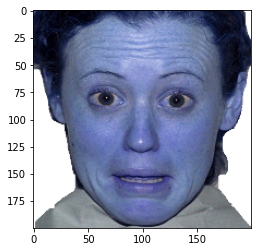

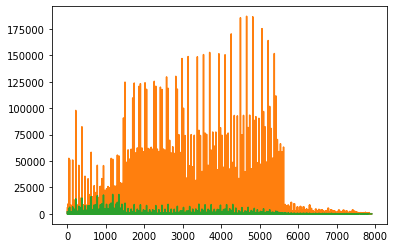

In [3]:
from pathlib import Path
from protosc.io import read_image, read_image2
from protosc.preprocessing import greyscale, viola_jones, cut_circle
from protosc.feature_extraction import fourier_features
import itertools
from matplotlib import pyplot as plt
import numpy as np
from scipy.sparse import csc_matrix, csr_matrix

stim_data_dir = Path("..", "data", "Nimstim faces")
grayscale = True

open_files = stim_data_dir.glob("*_O.bmp")
closed_files = stim_data_dir.glob("*_C.bmp")

#     img = open_files[0]
data_file = list(itertools.islice(open_files, 1))[0]
img2 = read_image2(data_file)
gimg = img2
vjimg = viola_jones(gimg)
cimg = vjimg
features = fourier_features(cimg, circle_cut=False)
plt.imshow(cimg)
plt.show()
plt.plot(np.absolute(features))

In [2]:
print(img.shape)
plt.imshow(img-np.mean(img))
plt.show()

NameError: name 'img' is not defined

In [ ]:
fft_map = np.fft.fftshift(np.fft.fft2(img-np.mean(img)))
shifted_fft = np.absolute(fft_map)

In [ ]:
plt.imshow(np.log(shifted_fft))
plt.show()
plt.imshow(np.log(np.absolute(np.fft.fft2(img))))

In [ ]:
def transform_matrix(shape, n_angular=80, n_spatial=70, inverse=True):
    size = shape[0]*shape[1]
    X, Y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    middle = np.array([shape[0]//2, shape[1]//2])
    X -= middle[0]
    Y -= middle[1]

    radius = np.sqrt(X**2 + Y**2)
    angle = np.arctan2(Y, X)

    d_angle = 2*np.pi/n_angular
    d_radius = np.max(middle)/n_spatial
    angle_id = ((angle/d_angle + 0.5*(n_angular+1))%n_angular).astype(int)
    radius_id = (radius/d_radius).astype(int)
    all_id = angle_id+radius_id*n_angular
    plt.imshow(all_id)
    plt.show()

    indptr = np.arange(size+1)
    indices = all_id.reshape(-1)
    data = np.ones(size, dtype=int)
    trans_matrix = csc_matrix((data, indices, indptr), shape=(all_id.max()+1, size))

    if not inverse:
        return trans_matrix

    idx, temp_counts = np.unique(all_id, return_counts=True)
    counts = np.zeros(all_id.max()+1)
    counts[idx] = temp_counts
    indptr = np.arange(size+1)
    indices = all_id.reshape(-1)
    data = 1/counts[all_id.reshape(-1)]
    
    inv_trans_matrix = csr_matrix((data, indices, indptr), shape=(size, all_id.max()+1))
    return trans_matrix, inv_trans_matrix

trans, trans_inv = transform_matrix(fft_map.shape)
trans_data = trans.dot(fft_map.reshape(-1, 1))
reverse = trans_inv.dot(trans_data).reshape(fft_map.shape)
plt.imshow(np.real(np.fft.ifft2(np.fft.ifftshift(reverse))))
plt.show()
    

In [ ]:
round(0.6)

In [ ]:
from scipy.sparse import csc_matrix
indptr = np.array([0,0,3,4])
indices = np.array([1,2,3,1])
data = np.arange(4)+1
csc_matrix((data, indices, indptr)).todense()
np.cumsum(data >2)